In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## importing data for 2020

In [2]:
dfq1= pd.read_csv("2020Q1.csv",skiprows=4)
dfq2= pd.read_csv("2020Q2.csv",skiprows=4)
dfq3= pd.read_csv("2020Q3.csv",skiprows=4)
dfq4= pd.read_csv("2020Q4.csv",skiprows=4)

In [3]:
data= [dfq1,dfq2,dfq3,dfq4]
df2020 = pd.concat(data)

In [4]:
df2020

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-01-13,CO,Bogotá,so2,316,0.2,2.8,0.5,1.47
1,2020-02-25,CO,Bogotá,so2,335,0.1,4.1,0.8,3.25
2,2020-03-09,CO,Bogotá,so2,308,0.2,5.4,0.6,3.51
3,2020-03-13,CO,Bogotá,so2,333,0.2,3.7,0.8,3.45
4,2020-03-27,CO,Bogotá,so2,323,0.2,13.8,0.7,27.21
...,...,...,...,...,...,...,...,...,...
586932,2020-12-31,PL,Kraków,o3,144,1.7,8.1,4.6,28.32
586933,2021-01-03,PL,Kraków,o3,144,0.5,7.1,2.1,30.05
586934,2020-10-12,PL,Kraków,o3,144,4.6,16.0,12.7,81.38
586935,2020-10-16,PL,Kraków,o3,144,1.2,5.9,3.5,18.86


In [5]:
df2020=df2020.rename(columns={"Country":"country_code"})
df2020

,Date,country_code,City,Specie,count,min,max,median,variance
0,2020-01-13,CO,Bogotá,so2,316,0.2,2.8,0.5,1.47
1,2020-02-25,CO,Bogotá,so2,335,0.1,4.1,0.8,3.25
2,2020-03-09,CO,Bogotá,so2,308,0.2,5.4,0.6,3.51
3,2020-03-13,CO,Bogotá,so2,333,0.2,3.7,0.8,3.45
4,2020-03-27,CO,Bogotá,so2,323,0.2,13.8,0.7,27.21
...,...,...,...,...,...,...,...,...,...
586932,2020-12-31,PL,Kraków,o3,144,1.7,8.1,4.6,28.32
586933,2021-01-03,PL,Kraków,o3,144,0.5,7.1,2.1,30.05
586934,2020-10-12,PL,Kraków,o3,144,4.6,16.0,12.7,81.38
586935,2020-10-16,PL,Kraków,o3,144,1.2,5.9,3.5,18.86


## creating new feature of normalized value to be used instead of max

In [6]:
df2020["value_scaled"]= df2020["variance"]*(df2020["max"]-df2020["min"])+df2020["min"]

In [7]:
df2020

,Date,country_code,City,Specie,count,min,max,median,variance,value_scaled
0,2020-01-13,CO,Bogotá,so2,316,0.2,2.8,0.5,1.47,4.022
1,2020-02-25,CO,Bogotá,so2,335,0.1,4.1,0.8,3.25,13.100
2,2020-03-09,CO,Bogotá,so2,308,0.2,5.4,0.6,3.51,18.452
3,2020-03-13,CO,Bogotá,so2,333,0.2,3.7,0.8,3.45,12.275
4,2020-03-27,CO,Bogotá,so2,323,0.2,13.8,0.7,27.21,370.256
...,...,...,...,...,...,...,...,...,...,...
586932,2020-12-31,PL,Kraków,o3,144,1.7,8.1,4.6,28.32,182.948
586933,2021-01-03,PL,Kraków,o3,144,0.5,7.1,2.1,30.05,198.830
586934,2020-10-12,PL,Kraków,o3,144,4.6,16.0,12.7,81.38,932.332
586935,2020-10-16,PL,Kraków,o3,144,1.2,5.9,3.5,18.86,89.842


In [8]:
df2020["Specie"].unique()

array(['so2', 'wind speed', 'wd', 'wind gust', 'pm10', 'o3', 'pm25',
       'humidity', 'pressure', 'wind-gust', 'dew', 'temperature',
       'precipitation', 'wind-speed', 'co', 'no2', 'aqi', 'uvi', 'neph',
       'pol', 'pm1', 'mepaqi'], dtype=object)

 creation columns for each specie

In [9]:
df2020= pd.pivot_table(df2020,values="value_scaled",index=["Date","country_code","City"],columns=["Specie"])
df2020

Specie                                  aqi       co      dew    humidity  \
Date       country_code City                                                
2019-12-30 AE           Abu Dhabi       NaN    0.100      NaN         NaN   
                        Dubai           NaN      NaN      NaN         NaN   
           AF           Kabul           NaN      NaN      NaN         NaN   
           AR           Buenos Aires    NaN  957.774      NaN         NaN   
           AT           Graz            NaN    0.100      NaN         NaN   
...                                     ...      ...      ...         ...   
2021-01-03 ZA           Middelburg      NaN    1.216      NaN  267975.817   
                        Port Elizabeth  NaN   32.234  302.540   58657.615   
                        Pretoria        NaN   68.868   13.000  106577.748   
                        Richards Bay    NaN      NaN   50.398   41351.510   
                        Vereeniging     NaN  206.824      NaN  567524.624   

Specie                                  mepaqi  neph        no2         o3  \
Date       country_code City                                                 
2019-12-30 AE           Abu Dhabi          NaN   NaN  64550.572  73893.200   
                        Dubai              NaN   NaN        NaN  14399.420   
           AF           Kabul              NaN   NaN        NaN        NaN   
           AR           Buenos Aires       NaN   NaN   3021.488     21.091   
           AT           Graz               NaN   NaN  11990.395        NaN   
...                                        ...   ...        ...        ...   
2021-01-03 ZA           Middelburg         NaN   NaN        NaN    184.535   
                        Port Elizabeth     NaN   NaN     91.457    617.522   
                        Pretoria           NaN   NaN   6586.316        NaN   
                        Richards Bay       NaN   NaN    139.525        NaN   
                        Vereeniging        NaN   NaN    593.316   8639.074   

Specie                                  pm1       pm10  ...  precipitation  \
Date       country_code City                            ...                  
2019-12-30 AE           Abu Dhabi       NaN   21183.50  ...            NaN   
                        Dubai           NaN        NaN  ...            NaN   
           AF           Kabul           NaN        NaN  ...            NaN   
           AR           Buenos Aires    NaN  363192.94  ...            NaN   
           AT           Graz            NaN   68998.50  ...            NaN   
...                                     ...        ...  ...            ...   
2021-01-03 ZA           Middelburg      NaN    1765.15  ...            NaN   
                        Port Elizabeth  NaN   58224.38  ...        350.420   
                        Pretoria        NaN    3207.48  ...            NaN   
                        Richards Bay    NaN    9176.96  ...     673257.662   
                        Vereeniging     NaN  241080.70  ...            NaN   

Specie                                      pressure         so2  temperature  \
Date       country_code City                                                    
2019-12-30 AE           Abu Dhabi                NaN     288.972          NaN   
                        Dubai                    NaN         NaN          NaN   
           AF           Kabul                    NaN         NaN          NaN   
           AR           Buenos Aires             NaN         NaN          NaN   
           AT           Graz                     NaN      13.900          NaN   
...                                              ...         ...          ...   
2021-01-03 ZA           Middelburg      1.227436e+03       2.510     2739.220   
                        Port Elizabeth  1.431844e+03       1.272     1627.737   
                        Pretoria        1.052490e+09  360605.719     3947.736   
                        Richards Bay    2.309260e+03       9.737      855.442

In [10]:
df2020.isnull().sum()

Specie
aqi              217922
co                83612
dew               56661
humidity          11783
mepaqi           223017
neph             222646
no2               41991
o3                54620
pm1              222044
pm10              41296
pm25              35247
pol              222673
precipitation    199743
pressure          12646
so2               71311
temperature       11749
uvi              219724
wd               206896
wind gust        195121
wind speed       179313
wind-gust        132283
wind-speed        55181
dtype: int64

removing columns with many nan values(above 100000

In [11]:
df2020=df2020.drop(["wind-gust","wind speed","wind gust","wd","uvi","precipitation","pol","pm1","neph","mepaqi","aqi"], axis=1)
df2020=df2020.dropna(axis=0, how ="all")


In [12]:
df2020=df2020.replace(np.nan,-1)
df2020

Specie                                       co      dew    humidity  \
Date       country_code City                                           
2019-12-30 AE           Abu Dhabi         0.100   -1.000      -1.000   
                        Dubai            -1.000   -1.000      -1.000   
           AF           Kabul            -1.000   -1.000      -1.000   
           AR           Buenos Aires    957.774   -1.000      -1.000   
           AT           Graz              0.100   -1.000      -1.000   
...                                         ...      ...         ...   
2021-01-03 ZA           Middelburg        1.216   -1.000  267975.817   
                        Port Elizabeth   32.234  302.540   58657.615   
                        Pretoria         68.868   13.000  106577.748   
                        Richards Bay     -1.000   50.398   41351.510   
                        Vereeniging     206.824   -1.000  567524.624   

Specie                                        no2         o3       pm10  \
Date       country_code City                                              
2019-12-30 AE           Abu Dhabi       64550.572  73893.200   21183.50   
                        Dubai              -1.000  14399.420      -1.00   
           AF           Kabul              -1.000     -1.000      -1.00   
           AR           Buenos Aires     3021.488     21.091  363192.94   
           AT           Graz            11990.395     -1.000   68998.50   
...                                           ...        ...        ...   
2021-01-03 ZA           Middelburg         -1.000    184.535    1765.15   
                        Port Elizabeth     91.457    617.522   58224.38   
                        Pretoria         6586.316     -1.000    3207.48   
                        Richards Bay      139.525     -1.000    9176.96   
                        Vereeniging       593.316   8639.074  241080.70   

Specie                                         pm25      pressure         so2  \
Date       country_code City                                                    
2019-12-30 AE           Abu Dhabi          98127.48 -1.000000e+00     288.972   
                        Dubai             110510.66 -1.000000e+00      -1.000   
           AF           Kabul           35501968.00 -1.000000e+00      -1.000   
           AR           Buenos Aires     2912517.00 -1.000000e+00      -1.000   
           AT           Graz                  -1.00 -1.000000e+00      13.900   
...                                             ...           ...         ...   
2021-01-03 ZA           Middelburg         20954.08  1.227436e+03       2.510   
                        Port Elizabeth    289068.24  1.431844e+03       1.272   
                        Pretoria          147300.72  1.052490e+09  360605.719   
                        Richards Bay         409.98  2.309260e+03       9.737   
                        Vereeniging      1931063.60  9.082830e+06    1626.508   

Specie                                  temperature  wind-speed  
Date       country_code City                                     
2019-12-30 AE           Abu Dhabi            -1.000      -1.000  
                        Dubai                -1.000      -1.000  
           AF           Kabul                -1.000      -1.000  
           AR           Buenos Aires         -1.000      -1.000  
           AT           Graz                 -1.000      -1.000  
...                                             ...         ...  
2021-01-03 ZA           Middelburg         2739.220      26.440  
                        Port Elizabeth     1627.737     310.857  
                        Pretoria           3947.736      74.876  
                        Richards Bay        855.442     100.152  
                        Vereeniging        3760.392      49.036  

[223112 rows x 11 columns]

In [13]:
df2020=df2020.reset_index()
df2020["Date"]= pd.to_datetime(df2020["Date"])

In [14]:
df2020

Specie,Date,country_code,City,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind-speed
0,2019-12-30,AE,Abu Dhabi,0.100,-1.000,-1.000,64550.572,73893.200,21183.50,98127.48,-1.000000e+00,288.972,-1.000,-1.000
1,2019-12-30,AE,Dubai,-1.000,-1.000,-1.000,-1.000,14399.420,-1.00,110510.66,-1.000000e+00,-1.000,-1.000,-1.000
2,2019-12-30,AF,Kabul,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,35501968.00,-1.000000e+00,-1.000,-1.000,-1.000
3,2019-12-30,AR,Buenos Aires,957.774,-1.000,-1.000,3021.488,21.091,363192.94,2912517.00,-1.000000e+00,-1.000,-1.000,-1.000
4,2019-12-30,AT,Graz,0.100,-1.000,-1.000,11990.395,-1.000,68998.50,-1.00,-1.000000e+00,13.900,-1.000,-1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223107,2021-01-03,ZA,Middelburg,1.216,-1.000,267975.817,-1.000,184.535,1765.15,20954.08,1.227436e+03,2.510,2739.220,26.440
223108,2021-01-03,ZA,Port Elizabeth,32.234,302.540,58657.615,91.457,617.522,58224.38,289068.24,1.431844e+03,1.272,1627.737,310.857
223109,2021-01-03,ZA,Pretoria,68.868,13.000,106577.748,6586.316,-1.000,3207.48,147300.72,1.052490e+09,360605.719,3947.736,74.876
223110,2021-01-03,ZA,Richards Bay,-1.000,50.398,41351.510,139.525,-1.000,9176.96,409.98,2.309260e+03,9.737,855.442,100.152


correlation matrix just between all features

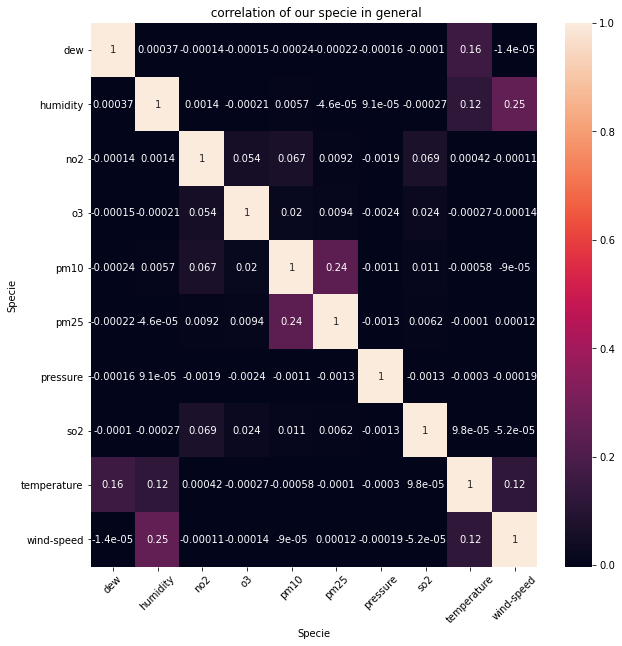

In [65]:
plt.figure(figsize=(10,10))
df2020_corr= df2020.iloc[:,4:]
correlation_matrix= df2020_corr.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=45)
plt.title(" correlation of our specie in general")
plt.show()




## india visualisation






In [16]:
df2020_india=df2020[df2020["country_code"]=="IN"]
df2020_india

Specie,Date,country_code,City,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind-speed
248,2019-12-30,IN,Bengaluru,6177.580,-1.000,-1.000,46101.245,31337.733,1.634581e+05,1.429439e+07,-1.000000e+00,2040220.760,-1.000,-1.000
249,2019-12-30,IN,Bhopal,1204.106,-1.000,-1.000,14271.650,45234.371,2.883241e+05,9.277260e+05,-1.000000e+00,108225.448,-1.000,-1.000
250,2019-12-30,IN,Chandigarh,11916.680,-1.000,-1.000,88449.264,8137.620,6.372444e+06,5.945136e+06,-1.000000e+00,4552.040,-1.000,-1.000
251,2019-12-30,IN,Chennai,325.636,-1.000,-1.000,1984.466,20190.076,4.556175e+04,2.498460e+06,-1.000000e+00,63877.083,-1.000,-1.000
252,2019-12-30,IN,Delhi,64485.310,56.250,99.100,295598.470,31625.800,2.404608e+08,6.774629e+07,1.020000e+03,93202.770,6.052,1.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222780,2021-01-03,IN,Patna,110988.668,182.500,300138.820,314453.530,108004.292,7.130094e+07,2.688980e+08,1.230887e+04,1637.812,13830.380,0.168
222781,2021-01-03,IN,Shillong,63725.092,32.940,657554.425,1856.556,318.402,5.431499e+07,2.749072e+07,2.250760e+09,1965.272,2669.410,52.220
222782,2021-01-03,IN,Thiruvananthapuram,1057.735,63.785,43655.526,1253.278,6584.137,1.206961e+05,1.349746e+06,4.271265e+07,77232.088,146.120,24.460
222783,2021-01-03,IN,Thrissur,94.300,71.570,120723.280,5.472,2958.635,9.549422e+07,1.832235e+06,1.078720e+03,1046.830,1159.400,12.675


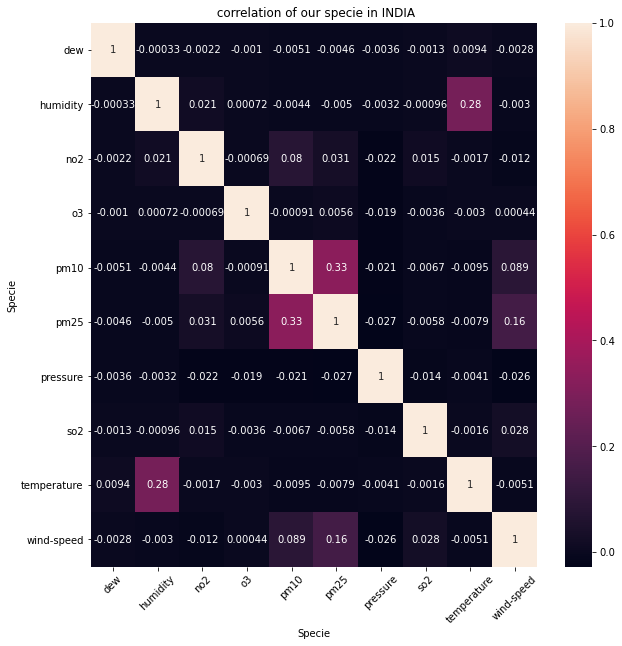

In [17]:
plt.figure(figsize=(10,10))
df2020_india_corr= df2020_india.iloc[:,4:]
correlation_matrix= df2020_india_corr.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.xticks(rotation=45)
plt.title(" correlation of our specie in INDIA")
plt.show()

In [18]:
df_lockdown_date= pd.read_csv("lockdown_dates_wikipedia.csv")
df_lockdown_date

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,third_lockdown_start_date,...,sixth_lockdown_end_date,sixth_lockdown_length,seventh_lockdown_start_date,seventh_lockdown_end_date,seventh_lockdown_length,eighth_lockdown_start_date,eighth_lockdown_end_date,eighth_lockdown_length,total_length,level
0,Albania,AL,Albania,2020-03-13,2020-06-01,80,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,National
1,Algeria,DZ,Algiers,2020-03-23,2020-05-14,52,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,City
2,Algeria,DZ,Blida,2020-03-23,2020-05-14,52,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,City
3,Argentina,AR,Greater Buenos Aires,2020-03-19,2020-11-08,234,2021-05-22,2021-05-30,9,2021-06-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,Metropolitan area
4,Argentina,AR,Rest of the country,2020-03-19,2020-05-10,52,2021-05-22,2021-05-30,9,2021-06-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,National
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Vietnam,VN,Da Nang,NaN,NaN,21,2020-07-28,2020-09-05,39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,City
235,Vietnam,VN,Hai Duong,NaN,NaN,21,2021-02-16,2021-03-02,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,"Province, Chi Linh city lockdown began from 28..."
236,Vietnam,VN,Bac Ninh,NaN,NaN,21,2021-05-18,NaN,23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,4 districts and 1 city
237,Vietnam,VN,Bac Giang,NaN,NaN,21,2021-05-18,NaN,23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,6 districts


In [19]:
df_lockdown_date=df_lockdown_date[df_lockdown_date["country_territory"]=="India"]
df_lockdown_date

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,third_lockdown_start_date,...,sixth_lockdown_end_date,sixth_lockdown_length,seventh_lockdown_start_date,seventh_lockdown_end_date,seventh_lockdown_length,eighth_lockdown_start_date,eighth_lockdown_end_date,eighth_lockdown_length,total_length,level
104,India,IN,Nationwide,2020-03-25,2020-06-07,74,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,National
105,India,IN,Bengaluru,NaN,NaN,NaN,2021-04-27,2021-05-09,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,Region
106,India,IN,Delhi,NaN,NaN,NaN,2021-04-19,2021-05-31,42,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,Region
107,India,IN,Haryana,NaN,NaN,NaN,2021-05-03,2021-05-10,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,State
108,India,IN,Maharashtra,NaN,NaN,NaN,2021-04-14,2021-06-15,62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,State
109,India,IN,Odisha,NaN,NaN,NaN,2021-05-05,2021-05-19,14,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,State
110,India,IN,Rajasthan,NaN,NaN,NaN,2021-05-10,2021-06-08,29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,State
111,India,IN,Uttar Pradesh,NaN,NaN,NaN,2021-04-30,2021-05-10,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,State


In [20]:
df_lockdown_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 104 to 111
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_territory            8 non-null      object 
 1   country_code                 8 non-null      object 
 2   place                        8 non-null      object 
 3   first_lockdown_start_date    1 non-null      object 
 4   first_lockdown_end_date      1 non-null      object 
 5   first_lockdown_length        1 non-null      object 
 6   second_lockdown_start_date   7 non-null      object 
 7   second_lockdown_end_date     7 non-null      object 
 8   second_lockdown_length       7 non-null      object 
 9   third_lockdown_start_date    0 non-null      object 
 10  third_lockdown_end_date      0 non-null      object 
 11  third_lockdown_length        0 non-null      float64
 12  fourth_lockdown_start_date   0 non-null      object 
 13  fourth_lockdown_end_

In [21]:
df_lockdown_date=df_lockdown_date.drop(["eighth_lockdown_length","eighth_lockdown_end_date","eighth_lockdown_start_date","seventh_lockdown_length","seventh_lockdown_end_date","seventh_lockdown_start_date","sixth_lockdown_length","sixth_lockdown_end_date","sixth_lockdown_start_date","fifth_lockdown_length","fifth_lockdown_end_date","fifth_lockdown_start_date","fourth_lockdown_length","fourth_lockdown_end_date","fourth_lockdown_start_date","third_lockdown_length","third_lockdown_end_date","third_lockdown_start_date"],axis=1)
df_lockdown_date

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,total_length,level
104,India,IN,Nationwide,2020-03-25,2020-06-07,74,NaN,NaN,NaN,74,National
105,India,IN,Bengaluru,NaN,NaN,NaN,2021-04-27,2021-05-09,12,12,Region
106,India,IN,Delhi,NaN,NaN,NaN,2021-04-19,2021-05-31,42,42,Region
107,India,IN,Haryana,NaN,NaN,NaN,2021-05-03,2021-05-10,7,7,State
108,India,IN,Maharashtra,NaN,NaN,NaN,2021-04-14,2021-06-15,62,62,State
109,India,IN,Odisha,NaN,NaN,NaN,2021-05-05,2021-05-19,14,14,State
110,India,IN,Rajasthan,NaN,NaN,NaN,2021-05-10,2021-06-08,29,29,State
111,India,IN,Uttar Pradesh,NaN,NaN,NaN,2021-04-30,2021-05-10,10,10,State


In [23]:
df_lockdown_date["first_lockdown_start_date"]=pd.to_datetime(df_lockdown_date["first_lockdown_start_date"])
df_lockdown_date["first_lockdown_end_date"]=pd.to_datetime(df_lockdown_date["first_lockdown_end_date"])
df_lockdown_date["second_lockdown_start_date"]=pd.to_datetime(df_lockdown_date["second_lockdown_start_date"])
df_lockdown_date["second_lockdown_end_date"]=pd.to_datetime(df_lockdown_date["second_lockdown_end_date"])


In [26]:
df_lockdown_date

,country_territory,country_code,place,first_lockdown_start_date,first_lockdown_end_date,first_lockdown_length,second_lockdown_start_date,second_lockdown_end_date,second_lockdown_length,total_length,level
104,India,IN,Nationwide,2020-03-25,2020-06-07,74,NaT,NaT,NaN,74,National
105,India,IN,Bengaluru,NaT,NaT,NaN,2021-04-27,2021-05-09,12,12,Region
106,India,IN,Delhi,NaT,NaT,NaN,2021-04-19,2021-05-31,42,42,Region
107,India,IN,Haryana,NaT,NaT,NaN,2021-05-03,2021-05-10,7,7,State
108,India,IN,Maharashtra,NaT,NaT,NaN,2021-04-14,2021-06-15,62,62,State
109,India,IN,Odisha,NaT,NaT,NaN,2021-05-05,2021-05-19,14,14,State
110,India,IN,Rajasthan,NaT,NaT,NaN,2021-05-10,2021-06-08,29,29,State
111,India,IN,Uttar Pradesh,NaT,NaT,NaN,2021-04-30,2021-05-10,10,10,State


In [30]:
#df2020_lockdown_india=pd.merge(df_lockdown_date,df2020_india, on="country_code")
#df2020_lockdown_india

In [31]:
df2020_india

Specie,Date,country_code,City,co,dew,humidity,no2,o3,pm10,pm25,pressure,so2,temperature,wind-speed
248,2019-12-30,IN,Bengaluru,6177.580,-1.000,-1.000,46101.245,31337.733,1.634581e+05,1.429439e+07,-1.000000e+00,2040220.760,-1.000,-1.000
249,2019-12-30,IN,Bhopal,1204.106,-1.000,-1.000,14271.650,45234.371,2.883241e+05,9.277260e+05,-1.000000e+00,108225.448,-1.000,-1.000
250,2019-12-30,IN,Chandigarh,11916.680,-1.000,-1.000,88449.264,8137.620,6.372444e+06,5.945136e+06,-1.000000e+00,4552.040,-1.000,-1.000
251,2019-12-30,IN,Chennai,325.636,-1.000,-1.000,1984.466,20190.076,4.556175e+04,2.498460e+06,-1.000000e+00,63877.083,-1.000,-1.000
252,2019-12-30,IN,Delhi,64485.310,56.250,99.100,295598.470,31625.800,2.404608e+08,6.774629e+07,1.020000e+03,93202.770,6.052,1.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222780,2021-01-03,IN,Patna,110988.668,182.500,300138.820,314453.530,108004.292,7.130094e+07,2.688980e+08,1.230887e+04,1637.812,13830.380,0.168
222781,2021-01-03,IN,Shillong,63725.092,32.940,657554.425,1856.556,318.402,5.431499e+07,2.749072e+07,2.250760e+09,1965.272,2669.410,52.220
222782,2021-01-03,IN,Thiruvananthapuram,1057.735,63.785,43655.526,1253.278,6584.137,1.206961e+05,1.349746e+06,4.271265e+07,77232.088,146.120,24.460
222783,2021-01-03,IN,Thrissur,94.300,71.570,120723.280,5.472,2958.635,9.549422e+07,1.832235e+06,1.078720e+03,1046.830,1159.400,12.675


## 'Mumbai visualization


In [34]:
df_mumbai=df2020_india[df2020_india["City"]=="Mumbai"]

<ipython-input-67-47e57274db34>:15: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  fig, axes=plt.subplots(4,3,"none",figsize=(18,16))
No handles with labels found to put in legend.


<Figure size 1080x720 with 0 Axes>

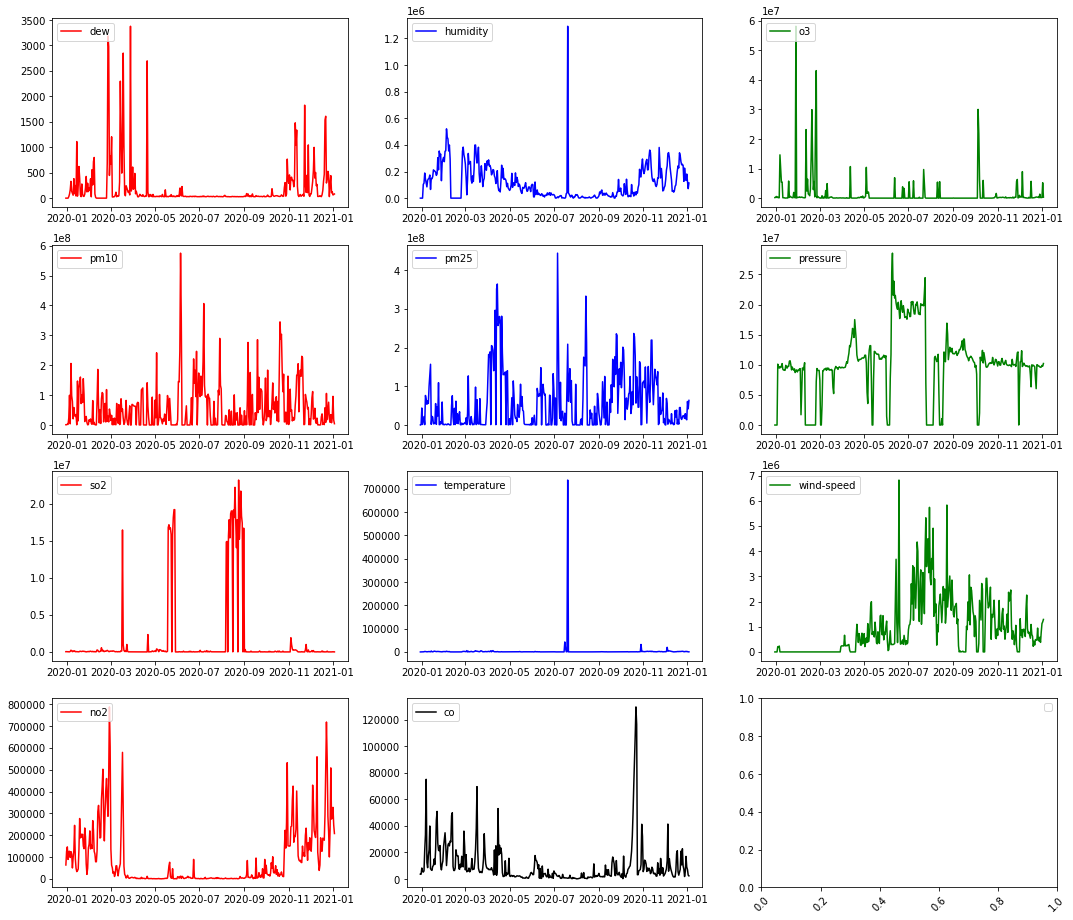

In [67]:
plt.figure(figsize=(15,10))
x= df_mumbai["Date"]
y1=df_mumbai["dew"]
y2=df_mumbai["humidity"]
y3=df_mumbai["o3"]
y4=df_mumbai["pm10"]
y5=df_mumbai["pm25"]
y6=df_mumbai["pressure"]
y7=df_mumbai["so2"]
y8=df_mumbai["temperature"]
y9=df_mumbai["wind-speed"]
y10=df_mumbai["no2"]
y11=df_mumbai["co"]

fig, axes=plt.subplots(4,3,"none",figsize=(18,16))
#axes.tick_params(labelrotation=45)

axes[0,0].plot(x,y1,color="r", label="dew" )
axes[0,0].legend(loc="upper left")

axes[0,1].plot(x,y2,color="b", label="humidity" )
axes[0,1].legend(loc="upper left")

axes[0,2].plot(x,y3,color="g", label="o3" )
axes[0,2].legend(loc="upper left")

axes[1,0].plot(x,y4,color="r", label="pm10" )
axes[1,0].legend(loc="upper left")

axes[1,1].plot(x,y5,color="b", label="pm25" )
axes[1,1].legend(loc="upper left")

axes[1,2].plot(x,y6,color="g", label="pressure" )
axes[1,2].legend(loc="upper left")

axes[2,0].plot(x,y7,color="r", label="so2" )
axes[2,0].legend(loc="upper left")

axes[2,1].plot(x,y8,color="b", label="temperature" )
axes[2,1].legend(loc="upper left")

axes[2,2].plot(x,y9,color="g", label="wind-speed" )
axes[2,2].legend(loc="upper left")

axes[3,0].plot(x,y10,color="r", label="no2" )
axes[3,0].legend(loc="upper left")

axes[3,1].plot(x,y11,color="k", label="co" )
axes[3,1].legend(loc="upper left")

plt.xticks(rotation=45)


plt.legend()
plt.show()

function to on all cities of India loading......

In [ ]:
#dflockdown_country.info()

In [ ]:
#dflockdown_country.isnull().sum()